In [ ]:
# Wywołanie bibliotek
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt




1.6.1


Pierwszym krokiem jest pobranie danych z X za pomocą biblioteki twikit oraz załadowanie ich do Pandas

In [14]:
# Pełne wyświetlanie
import pandas as pd


pd.set_option('display.max_colwidth', None)
    
df = pd.read_csv("_wybory2025.csv")

del df["Tweet_count"]

df

,Name,Text,Retweets,Likes,Date
0,Maja 🦋,"PiSiory ❗ Patałachy ❗ Szmaciarze ❗ Mam dla was, dwie wiadomości ⁉️ Złą ❗ bo Rafał Trzaskowski wygrywa w I turze 💪🤣 I drugą Złą ❗ Kończymy z Pisem 💪🤣 Prezydentem RP 2025 Rafał Trzaskowski ✌️🇵🇱 🥰 ♥️ Niedziela, 18 maja 2025 ! Głosujemy !!! #Trzaskowski2025 https://t.co/nakyhPCeeU",45,132,NaN
1,Marek Markowski,"Jak zablokować #RelokacjaTuska ? To proste wygrać wybory prezydenckie 2025 a następnie przyśpieszone wybory parlamentarne. Tusk, Bodnar, Giertych, Hołownia do więzienia i ogłaszamy koniec komuny w Polsce. https://t.co/02XQAcsEdG",878,3159,NaN
2,Krysia,Taką mamy rzeczywistość- Polska 2025 z prezydentem Rafałem Trzaskowskim ✌️🇵🇱. 18maja 2025 głosujemy i wybieramy prezydenta Polski🇵🇱 https://t.co/JXhu6xldQe,12,22,NaN
3,Rafał Gładysz ♠️♥️♣️♦️,"Moje wymarzone wybory prezydenckie 2025? Do drugiej rundy wchodzą @SlawomirMentzen i @K_Stanowski i o fotel prezydenta grają jeden na jednego w pokera w transmitowanym przez wszystkie telewizje pojedynku 😎 A potem ten, który wygra, od razu po zaprzysiężeniu legalizuje pokera w https://t.co/JNUYXfSYDs",15,843,NaN
4,🇵🇱Polka🇵🇱,18 maja 2025 r wszyscy na wybory 🗳️ #Prezydent2025 @NawrockiKn 🇵🇱♥️ https://t.co/tVKtyJkbc7,98,237,NaN
...,...,...,...,...,...
877,Nic o mnie,"@ciorka77 jeszcze trzeba wygrać wybory prezydenckie ale do tego jeszcze miesiąc, niecały",Sun Apr 27 06:20:47 +0000 2025,0,3.0
878,Jan Kowalski,"@donaldtusk Niedługo wybory prezydenckie. Może lepiej będzie wysłać tam Rafała. Zrobi się kilka zdjęć, jakieś nagranie.",Mon Apr 21 19:46:35 +0000 2025,0,2.0
879,Ogólnopolska Federacja Onkologiczna,Wybory'2025 - zadaliśmy pytania wszystkim kandydatkom i kandydatom na Prezydenta RP dotyczące ich potencjalnej aktywności w obszarze zdrowia w szczególności onkologii. Odpowiedzi będziemy publikować na naszej stronie. https://t.co/PnzO0IZ8bY,Thu Apr 24 12:55:33 +0000 2025,0,3.0
880,Robert,@MarcinPalade 25 procent Nawrockiego w tym momencie kampanii to dramat. Jak on ma wygrać te wybory prezydenckie?,Wed Apr 23 11:25:12 +0000 2025,0,2.0


Po załadowaniu pierwszej tabeli trzeba oczyścić dane z niepotrzebnych do tego projektu informacji.
Co przez to rozumiem?
    -> Kandydatów na Prezydenta bądź innych polityków
    -> Dane pochodzące z kont prowadzonych przez sztaby
    -> Tweety, które przedstawiają sondaże (do tego projektu są niepotrzebne)

In [15]:
with open("lista_kandydatow_i_sztaby", "r", encoding="utf-8") as file:
    prezydent = file.readlines()

with open("zabronione_konta", "a", encoding="utf-8") as file:
    file.writelines(prezydent)

In [16]:
# Pobranie i usunięcie niepotrzenych nazw użytkowników, które wcześniej
# były wyscrapowane z Wikipedii
with open("zabronione_konta", "r", encoding="utf-8") as file:
    words_to_remove = [line.strip() for line in file if line.strip()]

pattern = '|'.join(words_to_remove)
df_filtered = df[~df['Name'].str.contains(pattern, case=False, na=False, regex=True)]

# Usunięcie sondaży oraz zduplikowanych Tweetów
df_filtered = df_filtered[~df_filtered['Text'].str.contains('%', na=False)]
df_filtered = df_filtered.drop_duplicates()

# Zapis nazw do późniejszej analizy płci
df_filtered['Name'].to_excel("usernames.xlsx", sheet_name="Second")
df_filtered = df_filtered.drop(columns=['Likes', 'Date', 'Retweets'])
df_filtered

,Name,Text
0,Maja 🦋,"PiSiory ❗ Patałachy ❗ Szmaciarze ❗ Mam dla was, dwie wiadomości ⁉️ Złą ❗ bo Rafał Trzaskowski wygrywa w I turze 💪🤣 I drugą Złą ❗ Kończymy z Pisem 💪🤣 Prezydentem RP 2025 Rafał Trzaskowski ✌️🇵🇱 🥰 ♥️ Niedziela, 18 maja 2025 ! Głosujemy !!! #Trzaskowski2025 https://t.co/nakyhPCeeU"
1,Marek Markowski,"Jak zablokować #RelokacjaTuska ? To proste wygrać wybory prezydenckie 2025 a następnie przyśpieszone wybory parlamentarne. Tusk, Bodnar, Giertych, Hołownia do więzienia i ogłaszamy koniec komuny w Polsce. https://t.co/02XQAcsEdG"
2,Krysia,Taką mamy rzeczywistość- Polska 2025 z prezydentem Rafałem Trzaskowskim ✌️🇵🇱. 18maja 2025 głosujemy i wybieramy prezydenta Polski🇵🇱 https://t.co/JXhu6xldQe
3,Rafał Gładysz ♠️♥️♣️♦️,"Moje wymarzone wybory prezydenckie 2025? Do drugiej rundy wchodzą @SlawomirMentzen i @K_Stanowski i o fotel prezydenta grają jeden na jednego w pokera w transmitowanym przez wszystkie telewizje pojedynku 😎 A potem ten, który wygra, od razu po zaprzysiężeniu legalizuje pokera w https://t.co/JNUYXfSYDs"
4,🇵🇱Polka🇵🇱,18 maja 2025 r wszyscy na wybory 🗳️ #Prezydent2025 @NawrockiKn 🇵🇱♥️ https://t.co/tVKtyJkbc7
...,...,...
877,Nic o mnie,"@ciorka77 jeszcze trzeba wygrać wybory prezydenckie ale do tego jeszcze miesiąc, niecały"
878,Jan Kowalski,"@donaldtusk Niedługo wybory prezydenckie. Może lepiej będzie wysłać tam Rafała. Zrobi się kilka zdjęć, jakieś nagranie."
879,Ogólnopolska Federacja Onkologiczna,Wybory'2025 - zadaliśmy pytania wszystkim kandydatkom i kandydatom na Prezydenta RP dotyczące ich potencjalnej aktywności w obszarze zdrowia w szczególności onkologii. Odpowiedzi będziemy publikować na naszej stronie. https://t.co/PnzO0IZ8bY
880,Robert,@MarcinPalade 25 procent Nawrockiego w tym momencie kampanii to dramat. Jak on ma wygrać te wybory prezydenckie?


Pierwsza Analiza -> Analiza popularności kandydatów pod względem ilości wystąpień przy "wybory prezydenckie 2025"



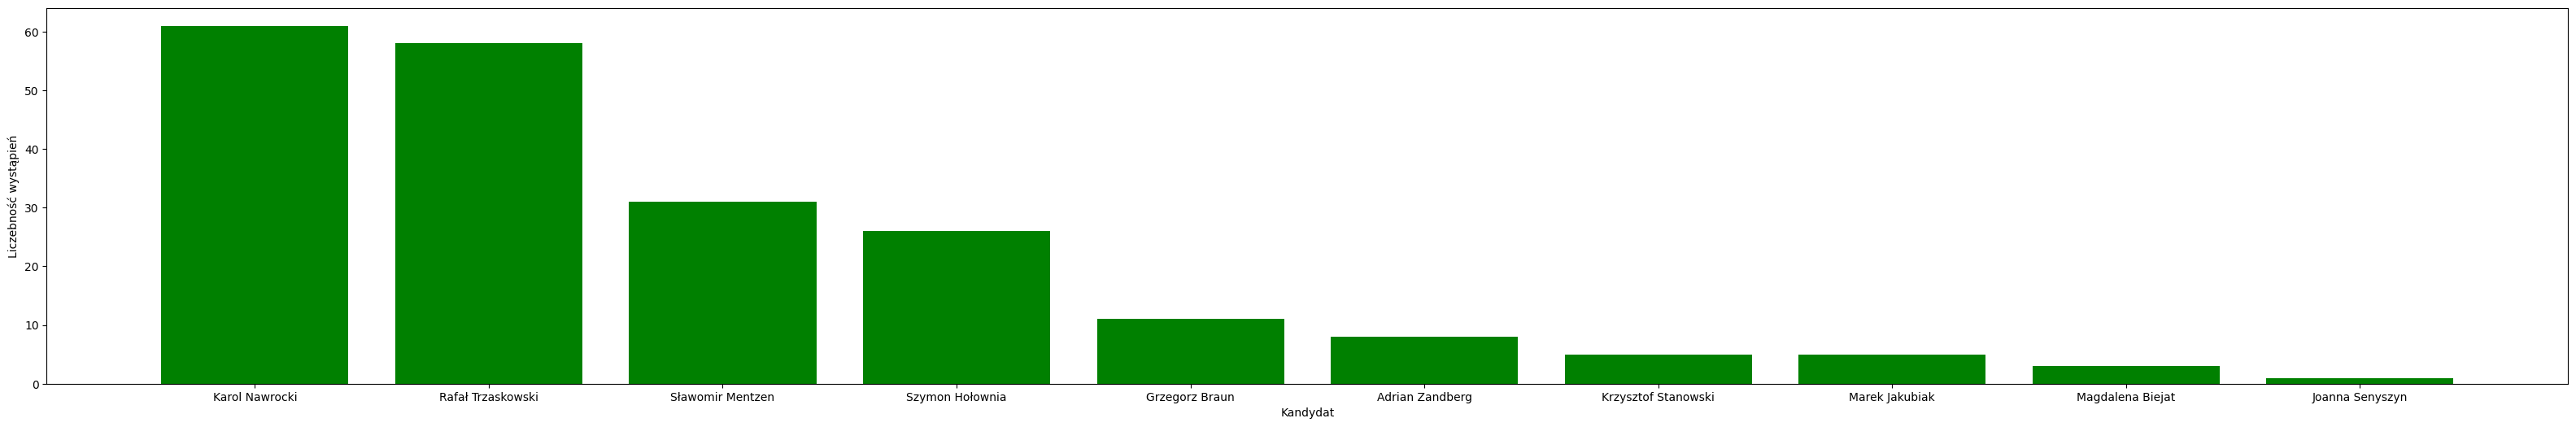

In [17]:
# Pobieranie z każdego wiersza 
with open("lista_kandydatow_i_sztaby", "r", encoding="utf-8") as f:
    kandydaci = [l.strip() for l in f if l.strip()]

# Liczenie popularności kandydatów 
counts = {
    k: df['Text'].str.contains(k, case=False, na=False).sum()
    for k in kandydaci
}

counts_for_bar = {}

# Wybranie z pliku .txt tylko kandydatów na prezydenta 
for i, key in enumerate(counts):
    if i >= 10:
        break
    else:
        counts_for_bar.update({ key: counts[key]})

# Sortowanie od najczęstszych do najmniej występujących 
counts_for_bar = sorted(counts_for_bar.items(), key=lambda kv: kv[1], reverse=True)
counts_for_bar = dict(counts_for_bar)

name_of_candidats = list(counts_for_bar.keys())
popularity = list(counts_for_bar.values())

# Wizualiazcja popularności wspomnień kandydatów
plt.figure(figsize=(40,6))
plt.bar(name_of_candidats, popularity, color="green")
plt.xlabel("Kandydat")
plt.ylabel("Liczebność wystąpień")

plt.show()

Druga Analiza -> Model, który będzie predyktować płeć użytkownika z nazwy

Krok 1. Przygotować dane pod model klasyfikacji

In [18]:
# Odczyt danych
df_gender = pd.read_excel(r"C:\Users\wikto\OneDrive\Dokumenty\ML\usernames_with_gender2.xlsx")
df_gender = df_gender.loc[:,~df_gender.columns.str.contains('Unnamed')]

In [19]:
cv = CountVectorizer()
X = cv.fit_transform(df_gender['Name']) # Zamienia wystąpienia słów na ilość

# Krótka wizualizacja 5 pierwszych X
print(X[:5]) # Cords(0,102) -> (wiersz,kolumna); Values -> wartość w tym miejscu
print(X.toarray()[:5]) # zamiana powyższej tablicy na tablicę
print(list(cv.vocabulary_.items())[:5]) # dict. ilość pojawiających się słów
print(cv.get_feature_names_out()[:5])

y = df_gender.Class


<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 7 stored elements and shape (5, 711)>
  Coords	Values
  (0, 325)	1
  (1, 334)	1
  (1, 340)	1
  (2, 281)	1
  (3, 487)	1
  (3, 190)	1
  (4, 457)	1
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[('maja', 325), ('marek', 334), ('markowski', 340), ('krysia', 281), ('rafał', 487)]
['09' '11' '12' '1973' '2013']


In [20]:
# Train, test split dla modelu klasyfikacji
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=123)

In [21]:
# Stworzenia modelu klasyfikacji (logistic regression)
from sklearn.linear_model import LogisticRegression

alg = LogisticRegression(random_state=123)
alg.fit(X_train, y_train)

y_pred = alg.predict(X_test)

# Accuracy of our Model
print("Trafność modelu (logistic regression): ",round(alg.score(X_test,y_test),1)*100,"%")

Trafność modelu (logistic regression):  80.0 %


Trzecia analiza -> Ile mężczyzn, kobiet, oraz kanałów informacyjnych udziela się na Tweeterze?

Ilosc wpisów mężczyzn: 336, kobiet: 131, kanałów informacyjnych: 232


Text(0, 0.5, 'How many Tweets')

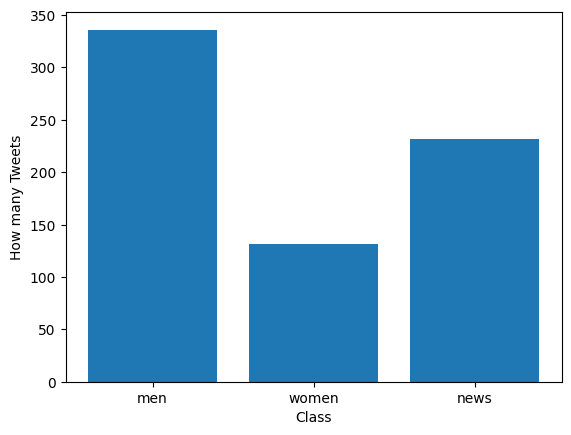

In [22]:
men_twitter = df_gender[df_gender.Class == 'm']
women_twitter = df_gender[df_gender.Class == 'w']
news_twitter = df_gender[df_gender.Class == 'n']

gender_how_many = {"men": len(men_twitter),"women": len(women_twitter), "news": len(news_twitter)}
gender = list(gender_how_many.keys())
gender_value = list(gender_how_many.values())

print(f"Ilosc wpisów mężczyzn: {len(men_twitter)}, kobiet: {len(women_twitter)}, kanałów informacyjnych: {len(news_twitter)}")

# Wykres 
plt.bar(gender, gender_value)
plt.xlabel("Class")
plt.ylabel("How many Tweets")

Z tego wykresu widać, że najwięcej użytkowników stanowią mężczyźni, później kanały informacyjne i na koniec kobiety